# Verificando os documentos e extraindo os dados

In [1]:
!which python

 (main)/home/tiago/.cache/pypoetry/virtualenvs/mutuca-X4QVRFRH-py3.11/bin/python


Os documentos que obtivemos não nos permitem realizar análises aprofundadas de maneira fácil. Não consiguimos, por exemplo, cruzar informações ou qualquer análise estatística sem que tenhamos um grande trabalho manipular os dados manualmente transferindo-os do formato pdf para uma planilha, por exemplo. 

Precisamos que o fluxo de trabalho inclua uma etapa de transformação desses dados para o formato texto, de forma que, a partir disso, possamos selecionar os dados de interesse para transformá-los novamente em um formato que seja ideal para análise dos dados como json, csv, xlsx etc.  

Para nos auxiliar nessa etapa complexa, eu irei testa a biblioteca [`pdfplumber` ](https://github.com/jsvine/pdfplumber). Essa é um pacote que permite obter informações detalhadas sobre um arquivo PDF, como cada caractere de texto, retângulo e linha. Além de possuir uma maneira fácil de extração de tabelas e - um recurso extremamente útil - depuração visual. 

## Identificando os dados de interesse

O conjunto de documentos que obtivemos com a raspagem nos fornecem dados de 2022, de Julho à Dezembro, e 2023, Janeiro até Setembro, que é o mês em que escrevo este estudo. 

Para cada mês, são fornecidos dois documentos, um com dados da cota de alimentação e o outro com os dados da cota de combustível. Os dados fornecidos em cada documento referen-se aos gastos de cada vereador por cota. A primeira página de cada relatório expõem uma tabela agregada das despesas por parlamentar, enquanto as páginas subsequentes detalham os gastos por parlamentar, data da compra, referência do fornecedor e valor da compra. Contudo, a depender do ano, os dados são apresentados em uma estruturação diferente. Entender como eles estão estruturados é vital para sabermos onde encortrar as informações que interessam quando transformarmos estes dados em texto:  

In [1]:
import pdfplumber
import re

### Analisando os documentos referentes à cota de alimentação e combustível de 2022

In [2]:
alimentacao_modelo_2022 = pdfplumber.open("../example_files/doc_cota_alimentacao_modelo_2022.pdf") 

In [3]:
alimentacao_p0_2022 = alimentacao_modelo_2022.pages[0]

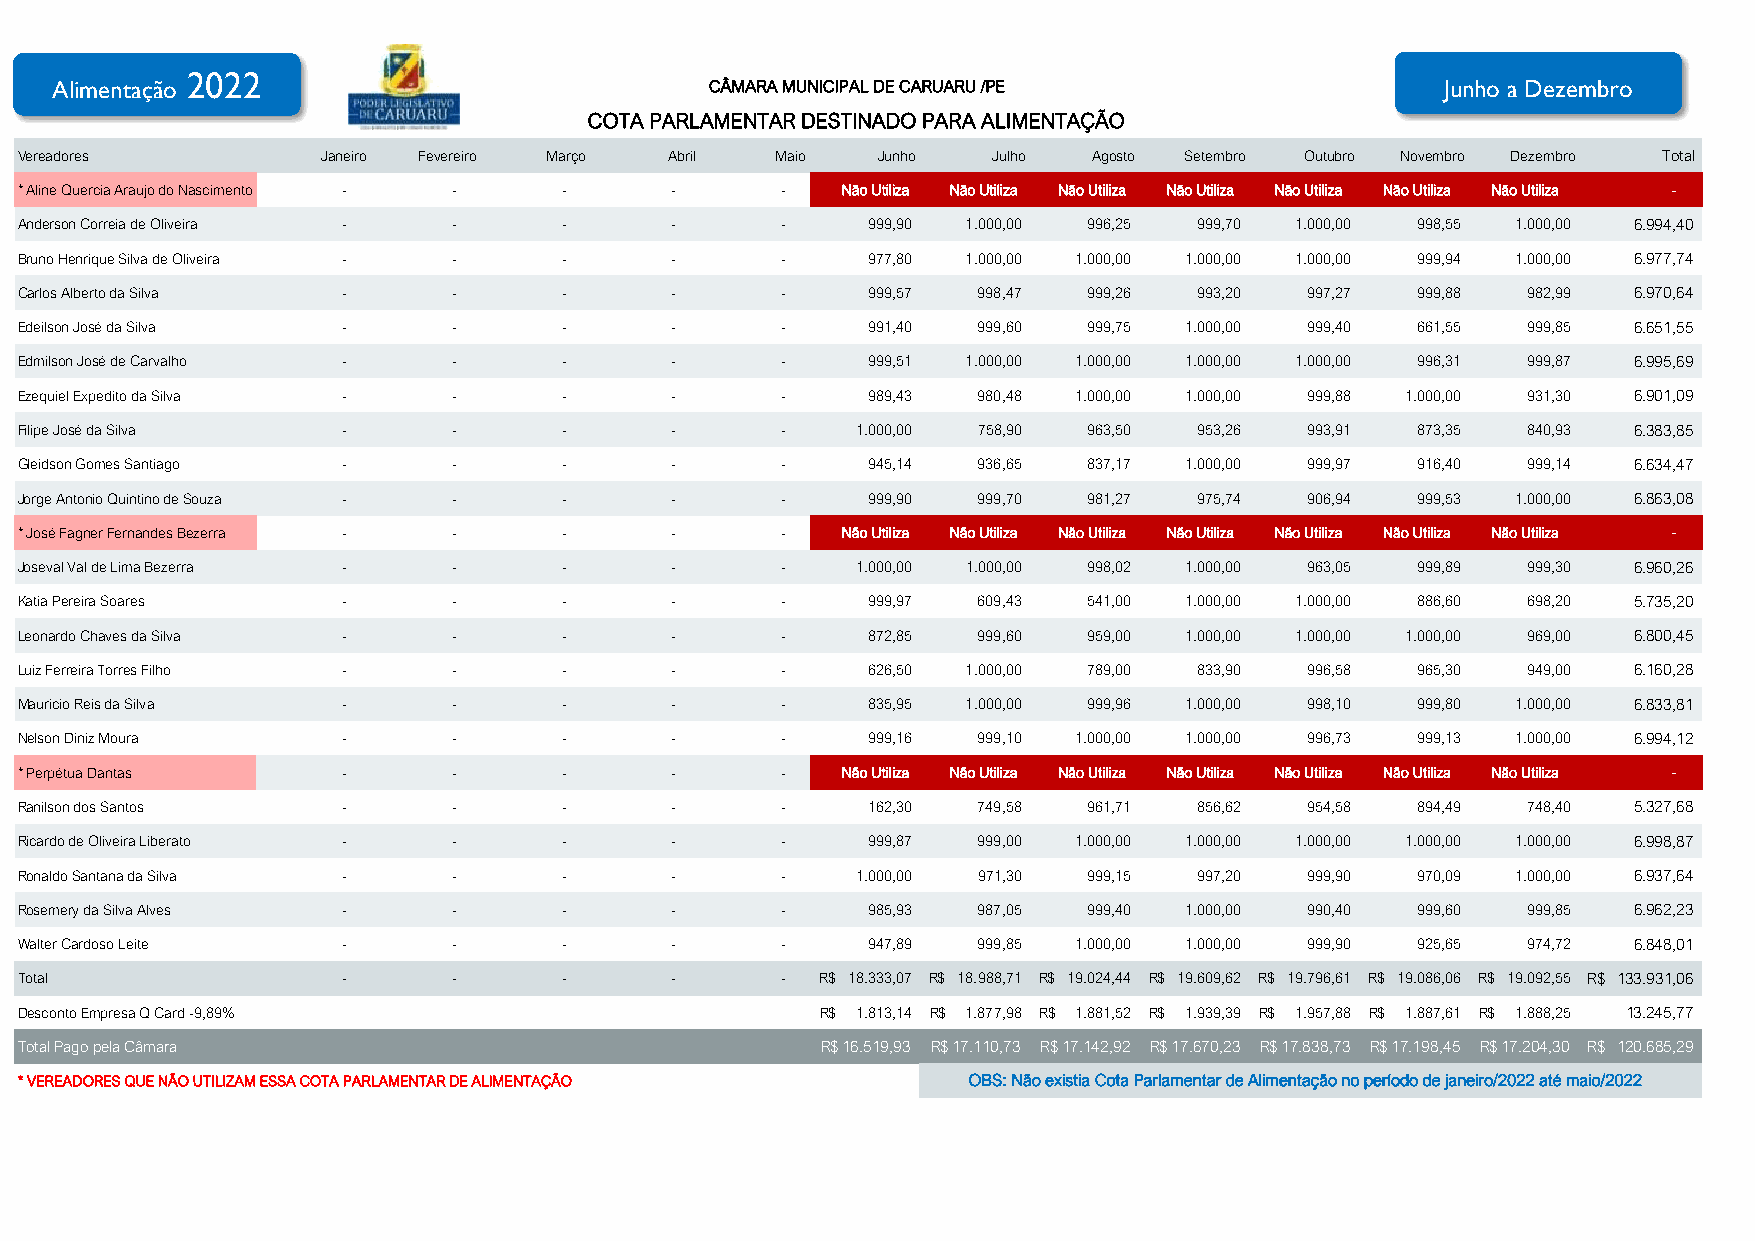

In [4]:
alimentacao_img_p0_2022 = alimentacao_p0_2022.to_image(resolution=150) 
alimentacao_img_p0_2022

A partir da segunda página de todos os relatórios da cota de alimentação, os dados são estruturados da seguinte maneira:

In [5]:
alimentacao_p1_2022 = alimentacao_modelo_2022.pages[1]

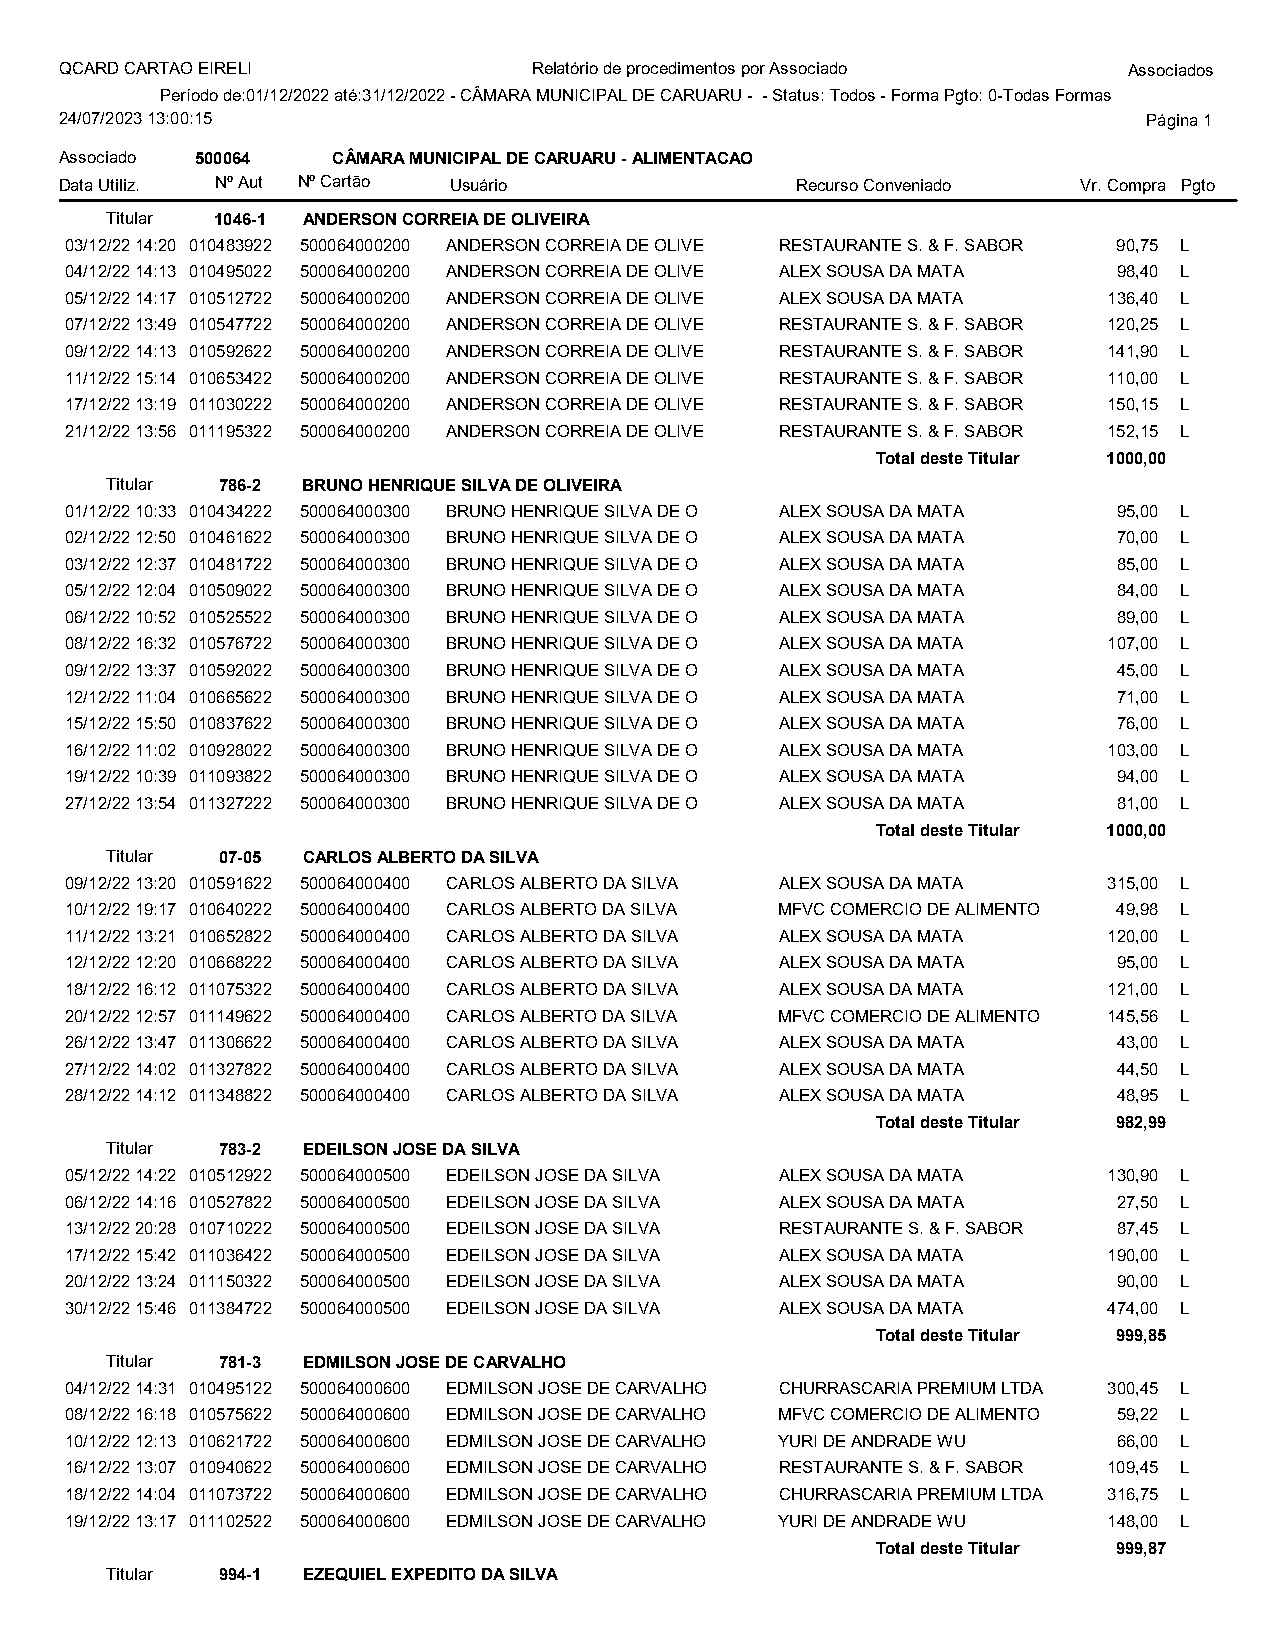

In [6]:
alimentacao_img_p1_2022 = alimentacao_p1_2022.to_image(resolution=150)
alimentacao_img_p1_2022

No caso dos documentos que registram a despesa com combustível, os dados são apresnetados da seguinte forma:

In [7]:
combustivel_modelo_2022 = pdfplumber.open("../example_files/doc_cota_combustivel_modelo_2022.pdf")

In [8]:
combustivel_p0_2022 = combustivel_modelo_2022.pages[0]

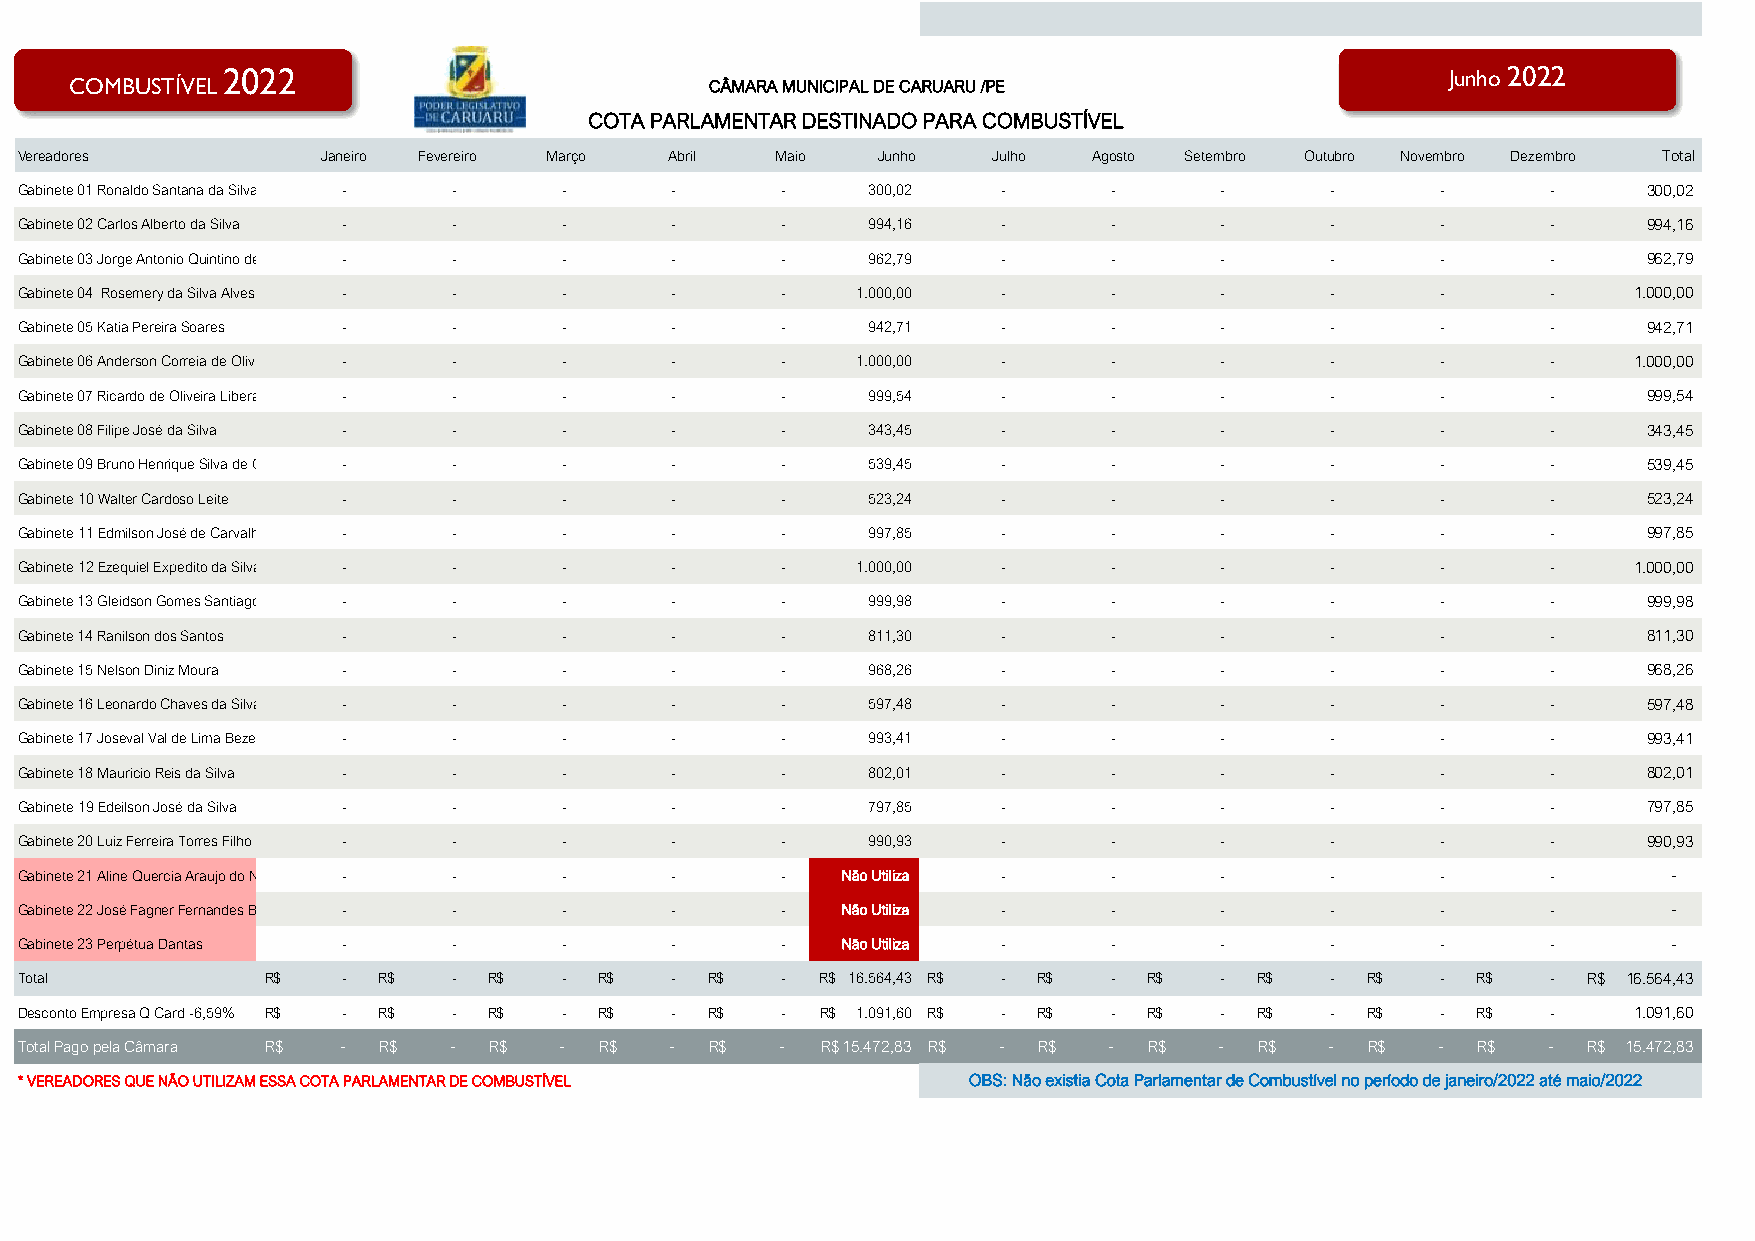

In [9]:
combustivel_img_p0_2022 = combustivel_p0_2022.to_image(resolution=150)
combustivel_img_p0_2022

Os documentos referentes ao combustível também apresenta uma tabela agregada como primeira página. A segunda página deve apresentar o relatório detalhado: 

In [10]:
combustivel_p1_2022 = combustivel_modelo_2022.pages[1]

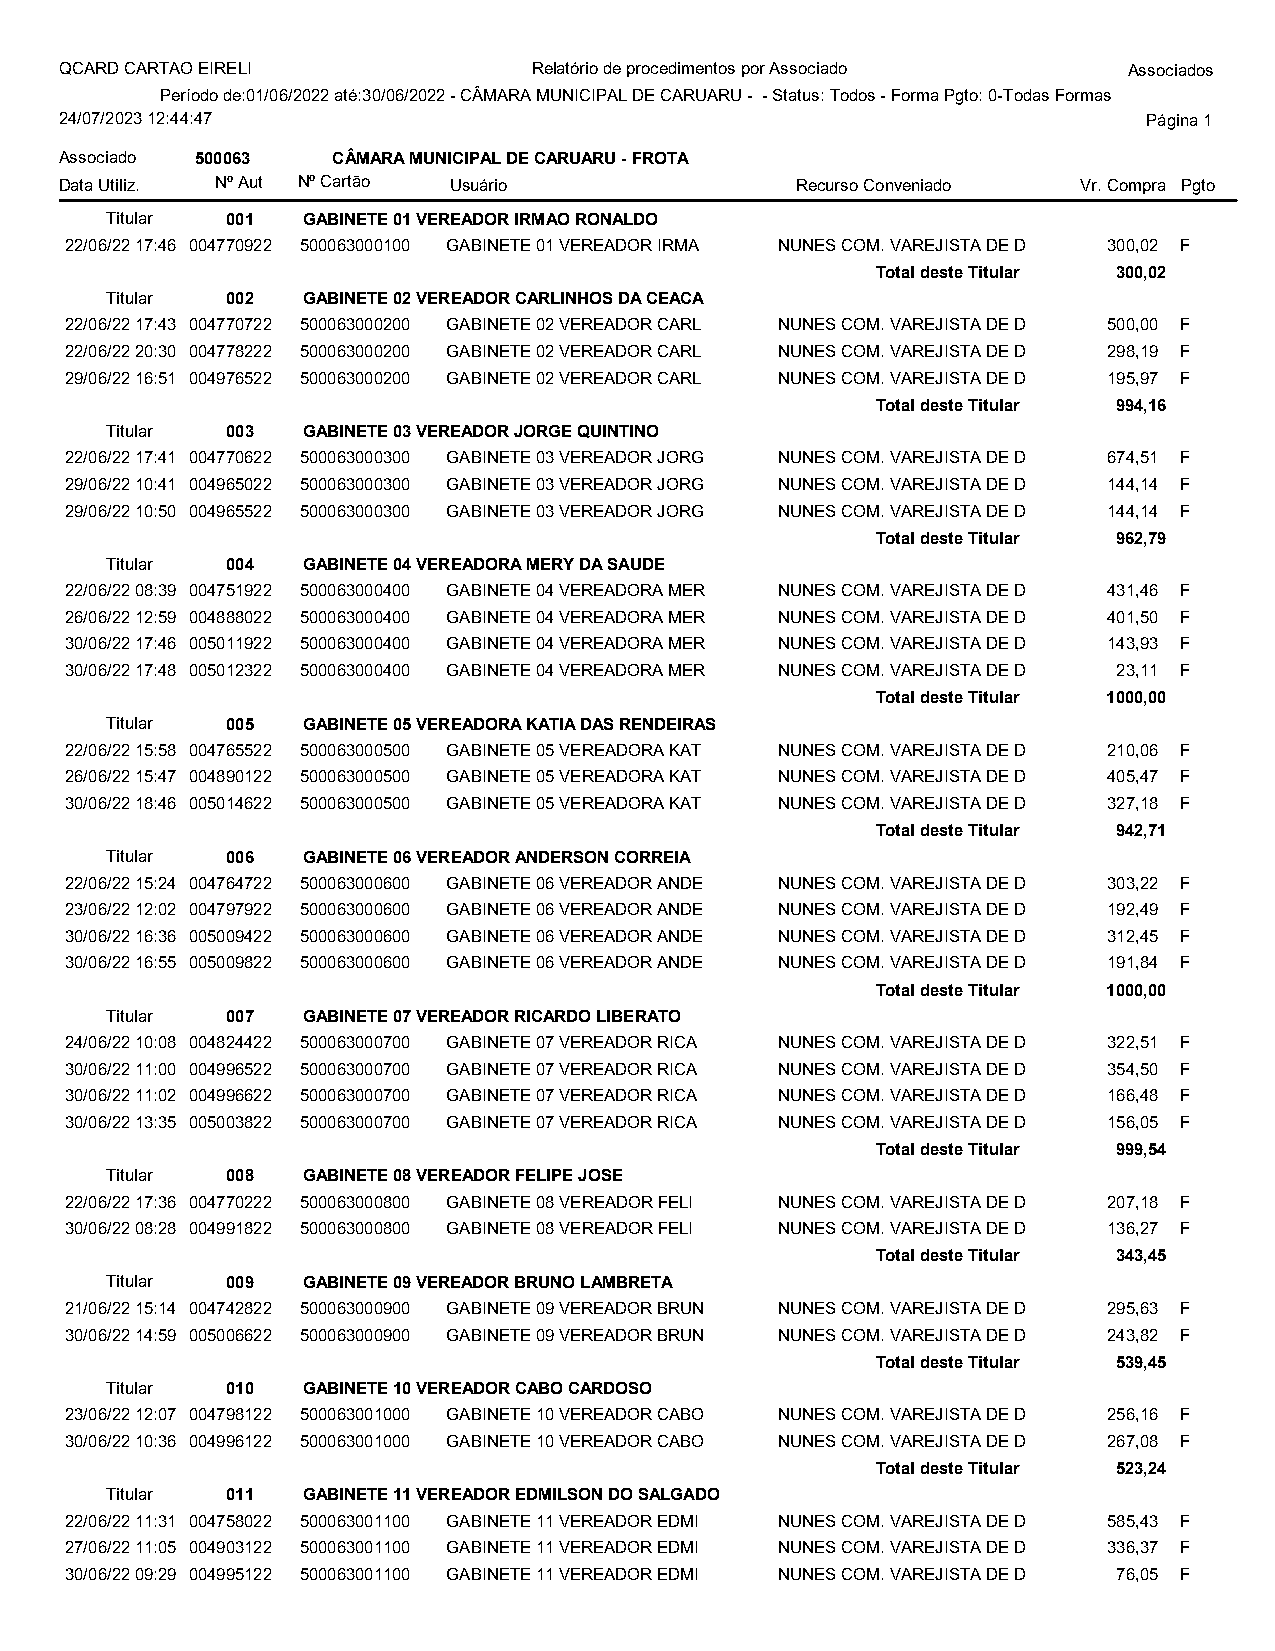

In [11]:
combustivel_img_p1_2022= combustivel_p1_2022.to_image(resolution=150)
combustivel_img_p1_2022

Os dados que nos interessam, portanto, são os que encontramos a partir da segunda página de cada categoria de documento (ALIMENTAÇÃO e FROTA). Eles se encontram nos campos marcados da imagem abaixo:

#### DADOS DE INTERESSE PARA COTA DE ALIMENTAÇÃO 2022
![dados_de_interesse_alimentacao](../img/dados_de_interesse.jpg)

#### DADOS DE INTERESSE PARA COTA DE COMBUSTÍVEL 2022

![dados_de_interesse_combustível](../img/dados_de_interesse_combustível.jpg)

### Analisando os documentos referentes à cota de alimentação e combustível de 2023 

In [12]:
alimentacao_modelo_2023 = pdfplumber.open("../example_files/doc_cota_alimentacao_modelo_2023.pdf")

In [13]:
alimentacao_p0_2023 = alimentacao_modelo_2023.pages[0]

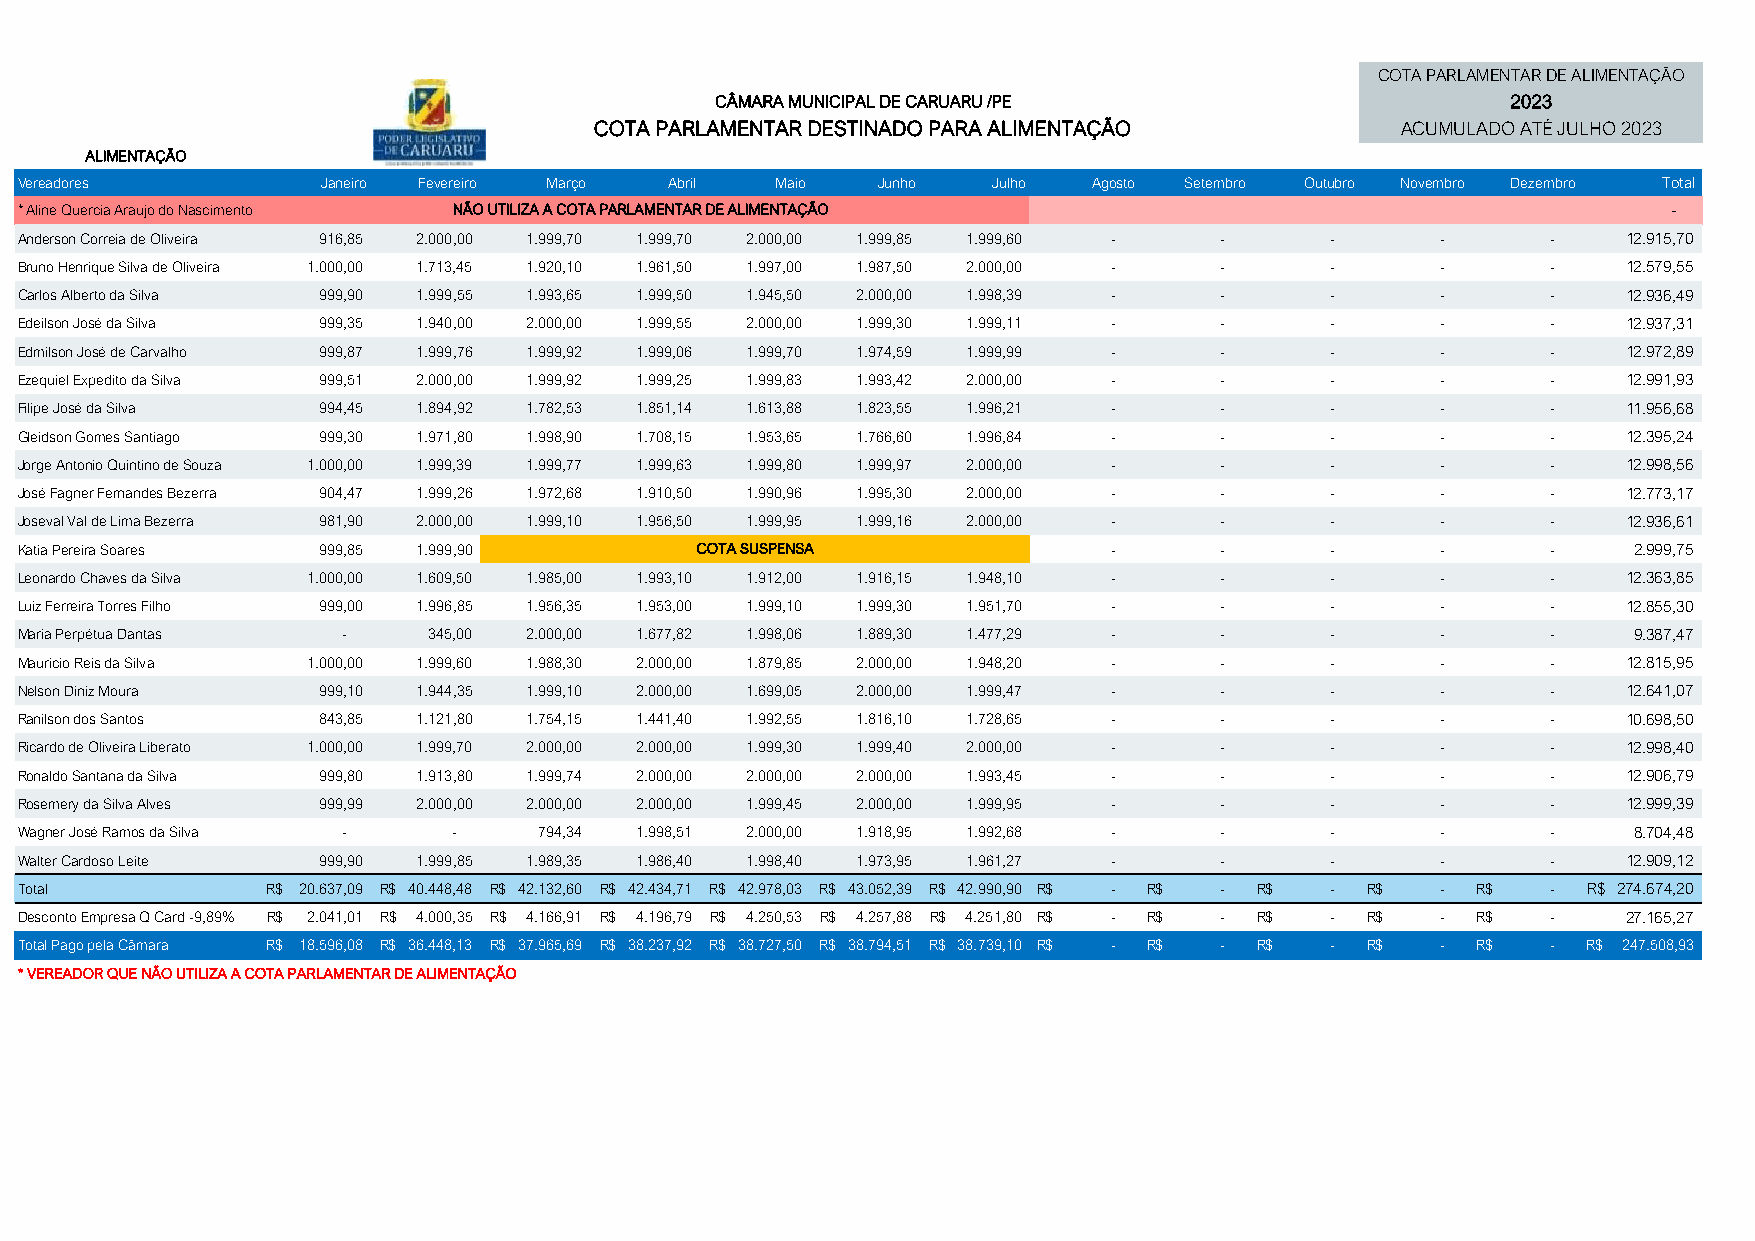

In [14]:
alimentacao_img_p0_2023 = alimentacao_p0_2023.to_image(resolution=150)
alimentacao_img_p0_2023

In [16]:
alimentacao_p1_2023 = alimentacao_modelo_2023.pages[1]

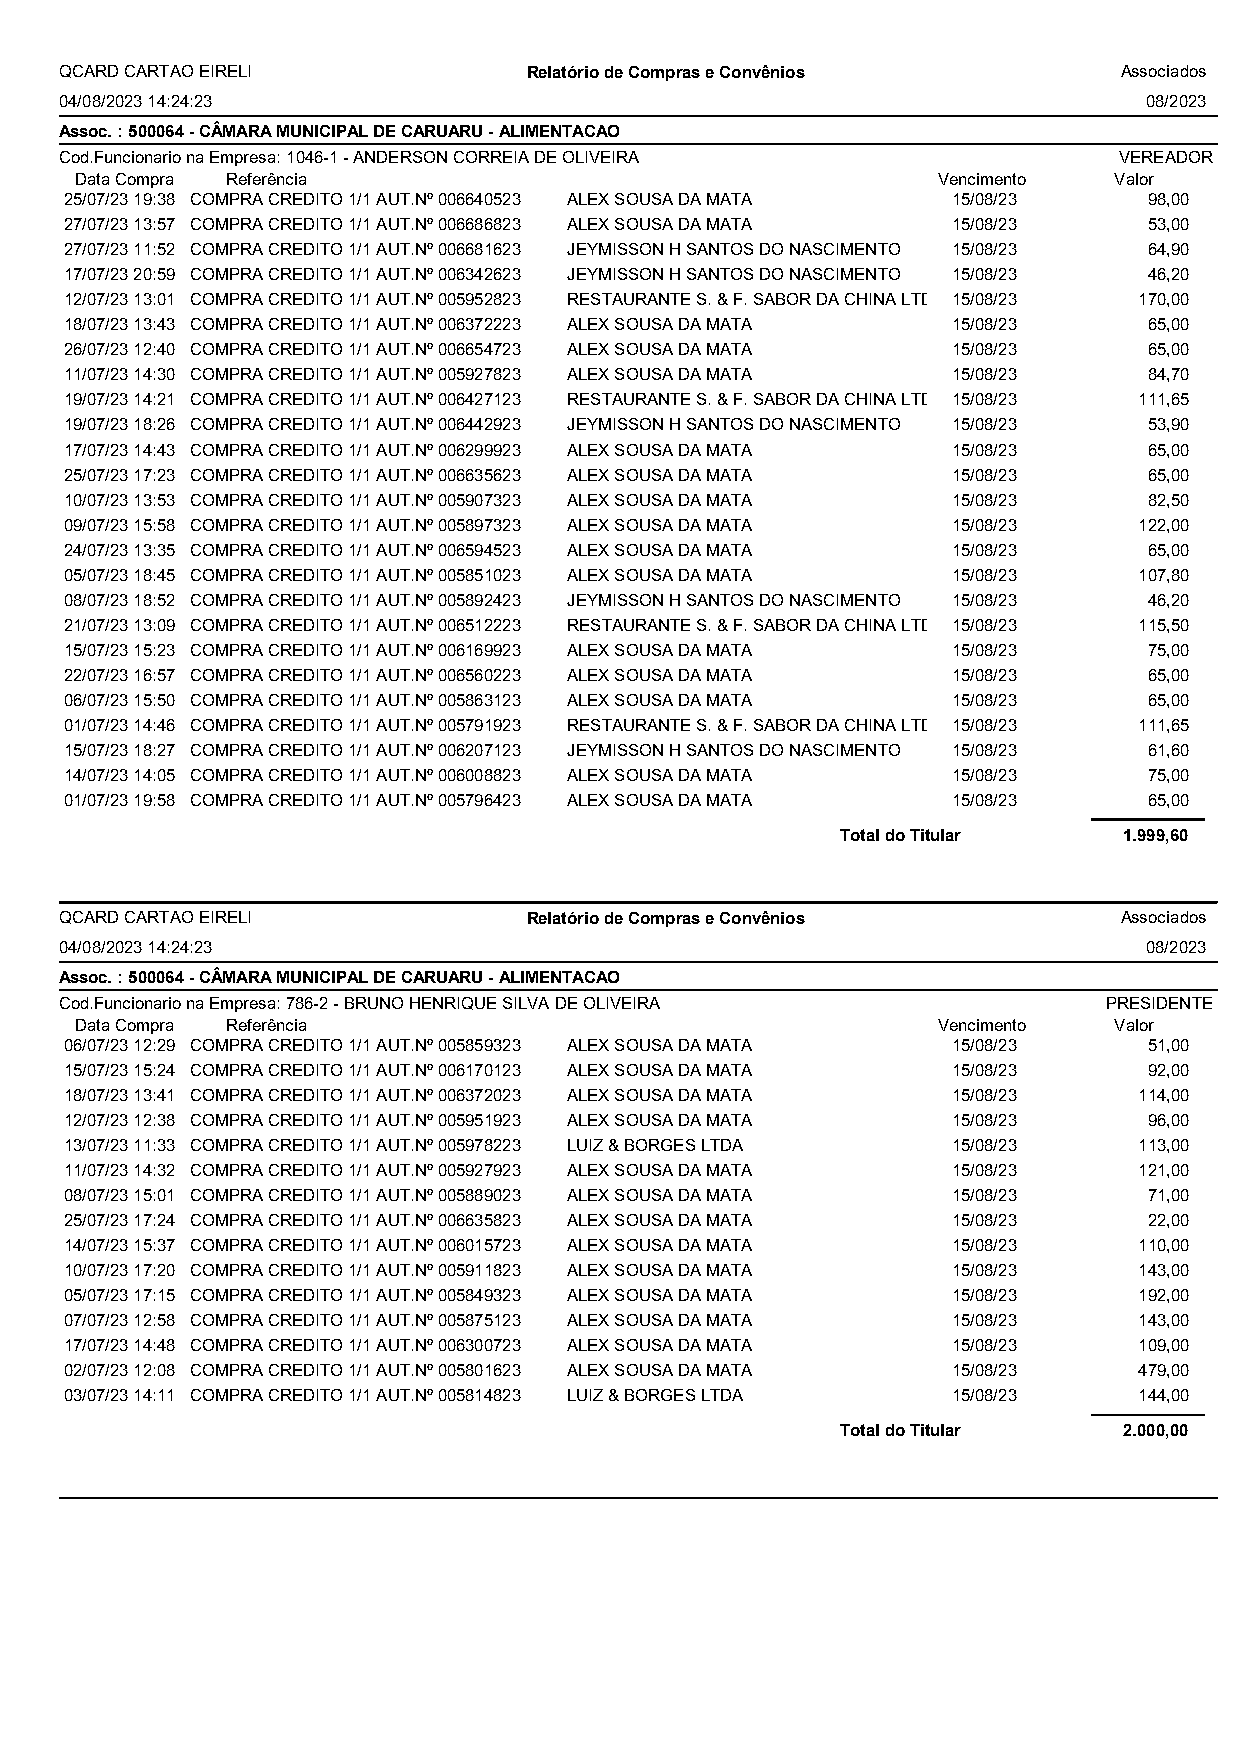

In [17]:
alimentacao_img_p1_2023 = alimentacao_p1_2023.to_image(resolution=150)
alimentacao_img_p1_2023

In [73]:
combustivel_modelo_2023 = pdfplumber.open("../example_files/doc_cota_combustivel_modelo_2023.pdf")
combustivel_modelo_2023

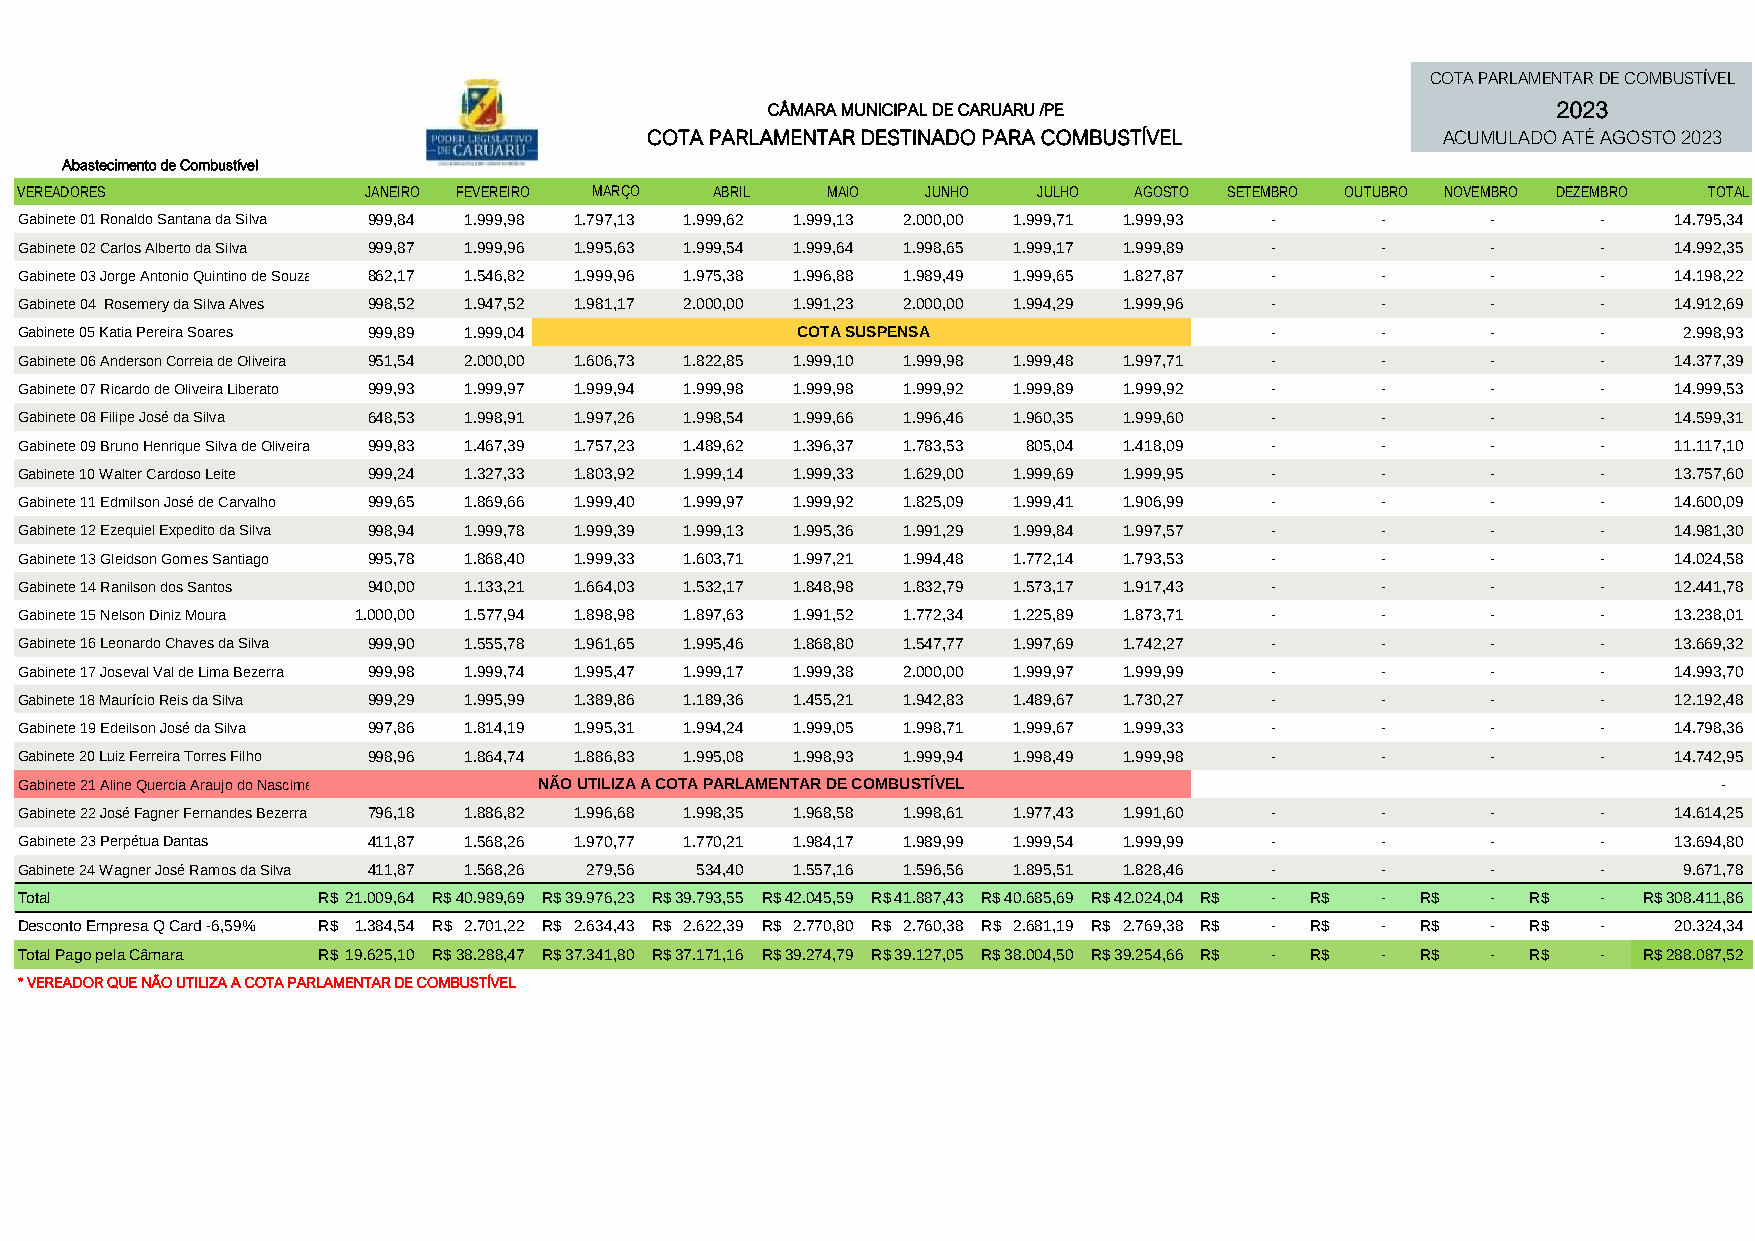

In [76]:
combustivel_p0_2023 = combustivel_modelo_2023.pages[0]
combustivel_img_p0_2023 = combustivel_p0_2023.to_image(resolution=150)
combustivel_img_p0_2023

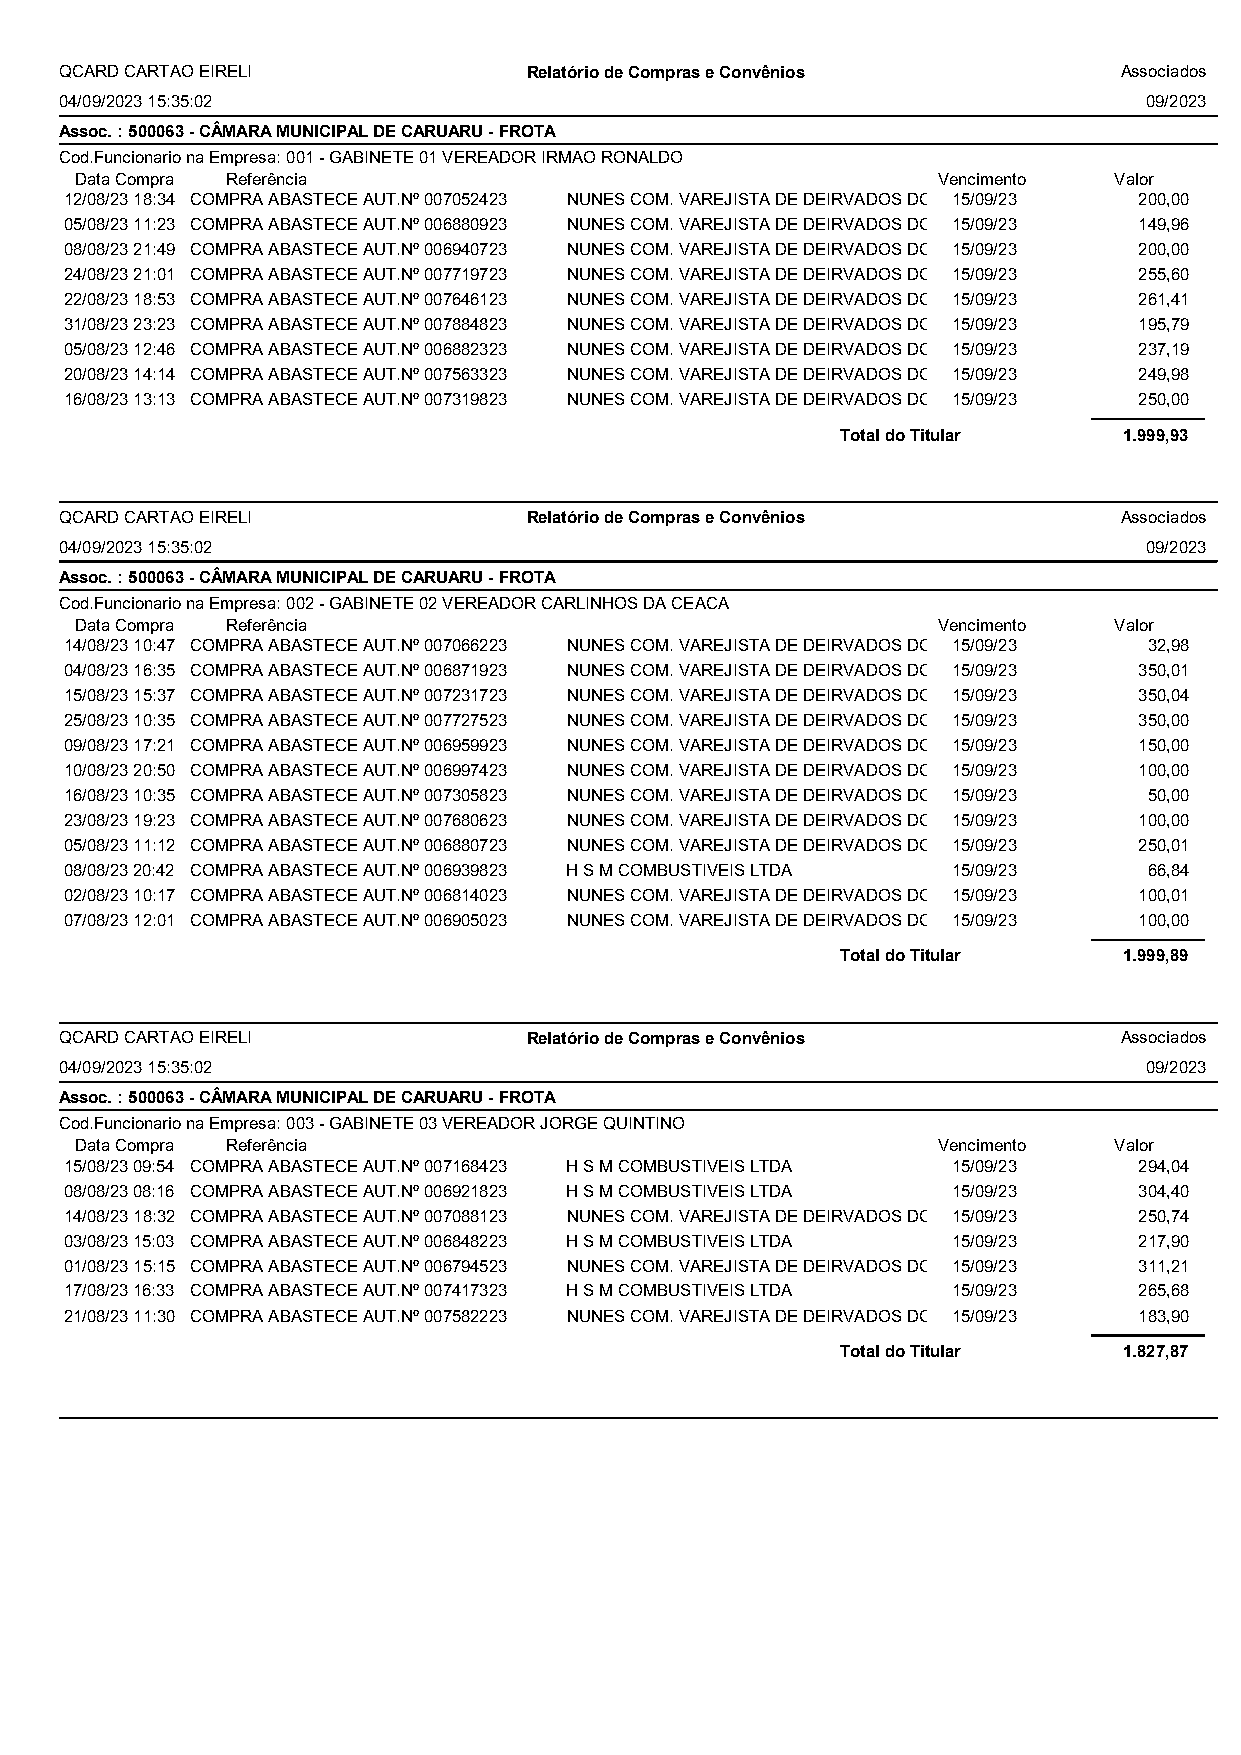

In [77]:
combustivel_p1_2023 = combustivel_modelo_2023.pages[1]
combustivel_img_p1_2023 = combustivel_p1_2023.to_image(resolution=150)
combustivel_img_p1_2023

Podemos notar a diferença tanto na forma como os dados são estruturados, quanto no nome de algumas características. Por exemplo, nos documentos de 2023, não temos "Período de..." que indica o período a que se refere os dados, temos apenas o mês de referência. Também temos a descriminação do cargo nos documentos de 2023 (VEREADOR, PRESIDENTE), dado que falta nos documentos de 2022. A imagem abaixo destaca os dodos de interesse nos relatórioas de 2023 quanto a cota de alimentação:

#### DADOS DE INTERESSE PARA COTA DE ALIMENTAÇÃO 2023 

![dados_de_interesse_alimentação_2023](../img/dados_de_interesse_alimentação_2023.jpg)

Quanto ao relatório da cota de combustível, o padrão da organização das informações é semelhante ao da cota de alimentação, com a diferença da discriminação do cargo. Este está junto a identificação do servidor. Assim como ocorre com os relatórios da cota de combustível de 2022, o titular é identificado pelo gabinete. Além disso, em alguns casos, quando a informação é muito longa, os dados estão cortados, como no destaque nº 9 abaixo:

#### DADOS DE INTERESSE PARA COTA DE COMBUSTÍVEL 2023 

![dados_de_interesse_frota_2023](../img/dados_de_interesse_frota_2023.jpg)

Podemos concluir que, com exceção da discriminação do cargo, os dois modelos de relatório trazem as mesmas informações:

1. Mês e ano de Referência das despesas
2. Data da emissão do documento
3. Associado
4. Categoria do documento
5. Código Identificador do servidor
6. Nome do servidor
7. Data da compra
8. Identificador da transação (número da compra)
9. Fornecedor 
10. Valor da compra
11. Gabinete (este dado está presente apenas nos casos dos dados nos relatórios de combustível)

Utilizando expressões regulares, vamos capturar esses dados para estruturá-los posteriormente da melhor forma. Contudo, primeiro precisamos extrair as informações para poder manipulá-las.

## Libertando os dados dos arquivos PDF

Utilizamos a lib pdfplumber para extrair os dados em uma arquivo de texto:

In [19]:
alimentacao_modelo_2022_text = alimentacao_p1_2022.extract_text(keep_blanck_lines=True)
alimentacao_modelo_2022_text

'QCARD CARTAO EIRELI Relatório de procedimentos por Associado Associados\nPeríodo de:01/12/2022 até:31/12/2022 - CÂMARA MUNICIPAL DE CARUARU - - Status: Todos - Forma Pgto: 0-Todas Formas\n24/07/2023 13:00:15 Página 1\nAssociado 500064 CÂMARA MUNICIPAL DE CARUARU - ALIMENTACAO\nData Utiliz. Nº Aut Nº Cartão Usuário Recurso Conveniado Vr. Compra Pgto\nTitular 1046-1 ANDERSON CORREIA DE OLIVEIRA\n03/12/22 14:20 010483922 500064000200 ANDERSON CORREIA DE OLIVE RESTAURANTE S. & F. SABOR 90,75 L\n04/12/22 14:13 010495022 500064000200 ANDERSON CORREIA DE OLIVE ALEX SOUSA DA MATA 98,40 L\n05/12/22 14:17 010512722 500064000200 ANDERSON CORREIA DE OLIVE ALEX SOUSA DA MATA 136,40 L\n07/12/22 13:49 010547722 500064000200 ANDERSON CORREIA DE OLIVE RESTAURANTE S. & F. SABOR 120,25 L\n09/12/22 14:13 010592622 500064000200 ANDERSON CORREIA DE OLIVE RESTAURANTE S. & F. SABOR 141,90 L\n11/12/22 15:14 010653422 500064000200 ANDERSON CORREIA DE OLIVE RESTAURANTE S. & F. SABOR 110,00 L\n17/12/22 13:19 011

In [22]:
combustivel_modelo_2022_text = combustivel_p1_2022.extract_text(keep_blanck_lines=True)
combustivel_modelo_2022_text

'QCARD CARTAO EIRELI Relatório de procedimentos por Associado Associados\nPeríodo de:01/06/2022 até:30/06/2022 - CÂMARA MUNICIPAL DE CARUARU - - Status: Todos - Forma Pgto: 0-Todas Formas\n24/07/2023 12:44:47 Página 1\nAssociado 500063 CÂMARA MUNICIPAL DE CARUARU - FROTA\nData Utiliz. Nº Aut Nº Cartão Usuário Recurso Conveniado Vr. Compra Pgto\nTitular 001 GABINETE 01 VEREADOR IRMAO RONALDO\n22/06/22 17:46 004770922 500063000100 GABINETE 01 VEREADOR IRMA NUNES COM. VAREJISTA DE D 300,02 F\nTotal deste Titular 300,02\nTitular 002 GABINETE 02 VEREADOR CARLINHOS DA CEACA\n22/06/22 17:43 004770722 500063000200 GABINETE 02 VEREADOR CARL NUNES COM. VAREJISTA DE D 500,00 F\n22/06/22 20:30 004778222 500063000200 GABINETE 02 VEREADOR CARL NUNES COM. VAREJISTA DE D 298,19 F\n29/06/22 16:51 004976522 500063000200 GABINETE 02 VEREADOR CARL NUNES COM. VAREJISTA DE D 195,97 F\nTotal deste Titular 994,16\nTitular 003 GABINETE 03 VEREADOR JORGE QUINTINO\n22/06/22 17:41 004770622 500063000300 GABINETE 

In [26]:
# Escreve os dados no arquivo txt
with open("../example_files/relatorio_alimentacao_2022_text", "w") as file:
    texto = file.write(alimentacao_modelo_2022_text)

with open("../example_files/relatorio_combustível_2022_text", "w") as file:
    texto = file.write(combustivel_modelo_2022_text)

## Definindo as expressões regulares para os relatórios de 2022

#### Relatórios de 2022

- **Mês de referência**:

In [29]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2022_text", "r") as file:
    texto = file.read()

mes_referencia_despesa = re.search(r"Período de:\d{2}\/(\d{2}\/\d{4})", texto).group(1)
mes_referencia_despesa

'12/2022'

In [30]:
# Combustível
with open("../example_files/relatorio_combustível_2022_text", "r") as file:
    texto = file.read()

mes_referencia_despesa = re.search(r"Período de:\d{2}\/(\d{2}\/\d{4})", texto).group(1)
mes_referencia_despesa

'06/2022'

- **Data da emissão do documento**

In [31]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2022_text", "r") as file:
    texto = file.read()

data_emissao = re.search(r"Formas\n(\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2})", texto).group(1)
data_emissao

'24/07/2023 13:00:15'

In [32]:
# Combustível
with open("../example_files/relatorio_combustível_2022_text", "r") as file:
    texto = file.read()

data_emissao = re.search(r"Formas\n(\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2})", texto).group(1)
data_emissao

'24/07/2023 12:44:47'

- **Associado e Categoria:**

In [36]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2022_text", "r") as file:
    texto = file.read()

res = re.search(r"(?:Associado\s\d{6})\s(CÂMARA MUNICIPAL DE CARUARU) - (ALIMENTACAO|FROTA)", texto)

associado_categoria = {
    "associado": res.group(1),
    "categoria": res.group(2),
}

associado_categoria

{'associado': 'CÂMARA MUNICIPAL DE CARUARU', 'categoria': 'ALIMENTACAO'}

In [37]:
# Combustível
with open("../example_files/relatorio_combustível_2022_text", "r") as file:
    texto = file.read()

res = re.search(r"(?:Associado\s\d{6})\s(CÂMARA MUNICIPAL DE CARUARU) - (ALIMENTACAO|FROTA)", texto)

associado_categoria = {
    "associado": res.group(1),
    "categoria": res.group(2),
}

associado_categoria

{'associado': 'CÂMARA MUNICIPAL DE CARUARU', 'categoria': 'FROTA'}

- **Código Identificador do servidor e nome:**

In [61]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2022_text", "r") as file:
    texto = file.read()
    
lista_vereadores = re.findall("(?:Titular\s)(\d+-\d+)\s([^\n]+)", texto)

vereadores = [{
   "cod_vereador": vereador[0], 
    "vereador_nome": vereador[1],
}for vereador in lista_vereadores]

vereadores

[{'cod_vereador': '1046-1', 'vereador_nome': 'ANDERSON CORREIA DE OLIVEIRA'},
 {'cod_vereador': '786-2',
  'vereador_nome': 'BRUNO HENRIQUE SILVA DE OLIVEIRA'},
 {'cod_vereador': '07-05', 'vereador_nome': 'CARLOS ALBERTO DA SILVA'},
 {'cod_vereador': '783-2', 'vereador_nome': 'EDEILSON JOSE DA SILVA'},
 {'cod_vereador': '781-3', 'vereador_nome': 'EDMILSON JOSE DE CARVALHO'},
 {'cod_vereador': '994-1', 'vereador_nome': 'EZEQUIEL EXPEDITO DA SILVA'}]

In [66]:
# Combustível
with open("../example_files/relatorio_combustível_2022_text", "r") as file:
    texto = file.read()
    
lista_vereadores = re.findall("(?:Titular\s)(\d+)\s(?:GABINETE\s)(\d+)\s([^\n]+)", texto)

vereadores = [{
    "cod_servidor": vereador[0],
    "gabinete": vereador[1],
    "nome_servidor": vereador[2],
}for vereador in lista_vereadores]

vereadores

[{'cod_servidor': '001',
  'gabinete': '01',
  'nome_servidor': 'VEREADOR IRMAO RONALDO'},
 {'cod_servidor': '002',
  'gabinete': '02',
  'nome_servidor': 'VEREADOR CARLINHOS DA CEACA'},
 {'cod_servidor': '003',
  'gabinete': '03',
  'nome_servidor': 'VEREADOR JORGE QUINTINO'},
 {'cod_servidor': '004',
  'gabinete': '04',
  'nome_servidor': 'VEREADORA MERY DA SAUDE'},
 {'cod_servidor': '005',
  'gabinete': '05',
  'nome_servidor': 'VEREADORA KATIA DAS RENDEIRAS'},
 {'cod_servidor': '006',
  'gabinete': '06',
  'nome_servidor': 'VEREADOR ANDERSON CORREIA'},
 {'cod_servidor': '007',
  'gabinete': '07',
  'nome_servidor': 'VEREADOR RICARDO LIBERATO'},
 {'cod_servidor': '008',
  'gabinete': '08',
  'nome_servidor': 'VEREADOR FELIPE JOSE'},
 {'cod_servidor': '009',
  'gabinete': '09',
  'nome_servidor': 'VEREADOR BRUNO LAMBRETA'},
 {'cod_servidor': '010',
  'gabinete': '10',
  'nome_servidor': 'VEREADOR CABO CARDOSO'},
 {'cod_servidor': '011',
  'gabinete': '11',
  'nome_servidor': 'VEREADO

- **Dados da compra:**

In [57]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2022_text", "r") as file:
    texto = file.read()
    
dados_compras = re.findall(r"(\d{2}/\d{2}/\d{2}\s\d{2}:\d{2})\s(\d{9})\s(?:\d{12}\s+)(.+?)\s+([\d+,\d+]+)", texto)

compras = [{
    "data_compra": compra[0],
    "num_referencia": compra[1],
    "estabelecimento": compra[2],
    "valor": compra[3],
}for compra in dados_compras]

compras

[{'data_compra': '03/12/22 14:20',
  'num_referencia': '010483922',
  'estabelecimento': 'ANDERSON CORREIA DE OLIVE RESTAURANTE S. & F. SABOR',
  'valor': '90,75'},
 {'data_compra': '04/12/22 14:13',
  'num_referencia': '010495022',
  'estabelecimento': 'ANDERSON CORREIA DE OLIVE ALEX SOUSA DA MATA',
  'valor': '98,40'},
 {'data_compra': '05/12/22 14:17',
  'num_referencia': '010512722',
  'estabelecimento': 'ANDERSON CORREIA DE OLIVE ALEX SOUSA DA MATA',
  'valor': '136,40'},
 {'data_compra': '07/12/22 13:49',
  'num_referencia': '010547722',
  'estabelecimento': 'ANDERSON CORREIA DE OLIVE RESTAURANTE S. & F. SABOR',
  'valor': '120,25'},
 {'data_compra': '09/12/22 14:13',
  'num_referencia': '010592622',
  'estabelecimento': 'ANDERSON CORREIA DE OLIVE RESTAURANTE S. & F. SABOR',
  'valor': '141,90'},
 {'data_compra': '11/12/22 15:14',
  'num_referencia': '010653422',
  'estabelecimento': 'ANDERSON CORREIA DE OLIVE RESTAURANTE S. & F. SABOR',
  'valor': '110,00'},
 {'data_compra': '17

In [70]:
# Combustível
with open("../example_files/relatorio_combustível_2022_text", "r") as file:
    texto = file.read()
    
dados_compras = re.findall(r"(\d{2}/\d{2}/\d{2}\s\d{2}:\d{2})\s(\d{9})\s(?:\d{12}\s+)(?:GABINETE\s(\d+)\s)(.+?)\s+([\d+,\d+]+)", texto)

compras = [{
    "data_compra": compra[0],
    "num_referencia": compra[1],
    "gabinete": compra[2],
    "estabelecimento": compra[3],
    "valor": compra[4],
}for compra in dados_compras]

compras

[{'data_compra': '22/06/22 17:46',
  'num_referencia': '004770922',
  'gabinete': '01',
  'estabelecimento': 'VEREADOR IRMA NUNES COM. VAREJISTA DE D',
  'valor': '300,02'},
 {'data_compra': '22/06/22 17:43',
  'num_referencia': '004770722',
  'gabinete': '02',
  'estabelecimento': 'VEREADOR CARL NUNES COM. VAREJISTA DE D',
  'valor': '500,00'},
 {'data_compra': '22/06/22 20:30',
  'num_referencia': '004778222',
  'gabinete': '02',
  'estabelecimento': 'VEREADOR CARL NUNES COM. VAREJISTA DE D',
  'valor': '298,19'},
 {'data_compra': '29/06/22 16:51',
  'num_referencia': '004976522',
  'gabinete': '02',
  'estabelecimento': 'VEREADOR CARL NUNES COM. VAREJISTA DE D',
  'valor': '195,97'},
 {'data_compra': '22/06/22 17:41',
  'num_referencia': '004770622',
  'gabinete': '03',
  'estabelecimento': 'VEREADOR JORG NUNES COM. VAREJISTA DE D',
  'valor': '674,51'},
 {'data_compra': '29/06/22 10:41',
  'num_referencia': '004965022',
  'gabinete': '03',
  'estabelecimento': 'VEREADOR JORG NUNES 

#### Relatórios de 2023

Os documentos de 2023 tem uma _layout_ semelhante para os relatórios de ALIMENTAÇÃO e FROTA. Mas algumas informações são diferentes, como o caso do "GABINETE", um dados que ocorre no relatório da cota de combustível, mas não ocorre no relatório da cota de alimentação.

Para definirmos quais as expressões regulares capturarão os dados de interesse, também exportamos os exemplos para texto:

In [71]:
alimentacao_modelo_2023_text = alimentacao_p1_2023.extract_text(keep_blank_lines=True)
alimentacao_modelo_2023_text

'QCARD CARTAO EIRELI Relatório de Compras e Convênios Associados\n04/08/2023 14:24:23 08/2023\nAssoc. : 500064 - CÂMARA MUNICIPAL DE CARUARU - ALIMENTACAO\nCod.Funcionario na Empresa: 1046-1 - ANDERSON CORREIA DE OLIVEIRA VEREADOR\nData Compra Referência Vencimento Valor\n25/07/23 19:38 COMPRA CREDITO 1/1 AUT.Nº 006640523 ALEX SOUSA DA MATA 15/08/23 98,00\n27/07/23 13:57 COMPRA CREDITO 1/1 AUT.Nº 006686823 ALEX SOUSA DA MATA 15/08/23 53,00\n27/07/23 11:52 COMPRA CREDITO 1/1 AUT.Nº 006681623 JEYMISSON H SANTOS DO NASCIMENTO 15/08/23 64,90\n17/07/23 20:59 COMPRA CREDITO 1/1 AUT.Nº 006342623 JEYMISSON H SANTOS DO NASCIMENTO 15/08/23 46,20\n12/07/23 13:01 COMPRA CREDITO 1/1 AUT.Nº 005952823 RESTAURANTE S. & F. SABOR DA CHINA LTDA 15/08/23 170,00\n18/07/23 13:43 COMPRA CREDITO 1/1 AUT.Nº 006372223 ALEX SOUSA DA MATA 15/08/23 65,00\n26/07/23 12:40 COMPRA CREDITO 1/1 AUT.Nº 006654723 ALEX SOUSA DA MATA 15/08/23 65,00\n11/07/23 14:30 COMPRA CREDITO 1/1 AUT.Nº 005927823 ALEX SOUSA DA MATA 15/08

In [79]:
combustivel_modelo_2023_text = combustivel_p1_2023.extract_text(keep_blank_lines=True)
combustivel_modelo_2023_text

'QCARD CARTAO EIRELI Relatório de Compras e Convênios Associados\n04/09/2023 15:35:02 09/2023\nAssoc. : 500063 - CÂMARA MUNICIPAL DE CARUARU - FROTA\nCod.Funcionario na Empresa: 001 - GABINETE 01 VEREADOR IRMAO RONALDO\nData Compra Referência Vencimento Valor\n12/08/23 18:34 COMPRA ABASTECE AUT.Nº 007052423 NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T5/09/23 200,00\n05/08/23 11:23 COMPRA ABASTECE AUT.Nº 006880923 NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T5/09/23 149,96\n08/08/23 21:49 COMPRA ABASTECE AUT.Nº 006940723 NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T5/09/23 200,00\n24/08/23 21:01 COMPRA ABASTECE AUT.Nº 007719723 NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T5/09/23 255,60\n22/08/23 18:53 COMPRA ABASTECE AUT.Nº 007646123 NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T5/09/23 261,41\n31/08/23 23:23 COMPRA ABASTECE AUT.Nº 007884823 NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T5/09/23 195,79\n05/08/23 12:46 COMPRA ABASTECE AUT.Nº 006882323 NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T5/09/23 237,19\n20/0

In [80]:
with open("../example_files/relatorio_alimentacao_2023_text", "w") as file:
    texto = file.write(alimentacao_modelo_2023_text)

with open("../example_files/relatorio_combustível_2023_text", "w") as file:
    texto = file.write(combustivel_modelo_2023_text)

- **Mês de referência**:

In [81]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2023_text", "r") as file:
    texto = file.read()

mes_referencia_despesa = re.search(r"(?:Associados\n\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2}\s)(\d{2}/\d{4})", texto).group(1)
mes_referencia_despesa

'08/2023'

In [82]:
# Combustível
with open("../example_files/relatorio_combustível_2023_text", "r") as file:
    texto = file.read()

mes_referencia_despesa = re.search(r"(?:Associados\n\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2}\s)(\d{2}/\d{4})", texto).group(1)
mes_referencia_despesa


'09/2023'

- **Data da emissão do documento**

In [85]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2023_text", "r") as file:
    texto = file.read()

data_emissao = re.search(r"(?:Associados\n)(\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2}\s)", texto).group(1)
data_emissao

'04/08/2023 14:24:23 '

In [86]:
# Combustível
with open("../example_files/relatorio_combustível_2023_text", "r") as file:
    texto = file.read()

data_emissao = re.search(r"(?:Associados\n)(\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2}\s)", texto).group(1)
data_emissao

'04/09/2023 15:35:02 '

- **Associado e Categoria:**

In [88]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2023_text", "r") as file:
    texto = file.read()
    
res = re.search(r"(?:Assoc.\s:\s\d{6}\s-\s)(CÂMARA MUNICIPAL DE CARUARU)\s-\s(ALIMENTACAO|FROTA)", texto)

associado_categoria = {
    "associado": res.group(1),
    "categoria": res.group(2),
}

associado_categoria


{'associado': 'CÂMARA MUNICIPAL DE CARUARU', 'categoria': 'ALIMENTACAO'}

In [89]:
# Combustível
with open("../example_files/relatorio_combustível_2023_text", "r") as file:
    texto = file.read()
    
res = re.search(r"(?:Assoc.\s:\s\d{6}\s-\s)(CÂMARA MUNICIPAL DE CARUARU)\s-\s(ALIMENTACAO|FROTA)", texto)

associado_categoria = {
    "associado": res.group(1),
    "categoria": res.group(2),
}

associado_categoria

{'associado': 'CÂMARA MUNICIPAL DE CARUARU', 'categoria': 'FROTA'}

- **Código Identificador do servidor e nome:**

In [93]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2023_text", "r") as file:
    texto = file.read()
    
lista_vereadores = re.findall("(?:Cod\.Funcionario na Empresa:\s)(\d+-\d+)\s-\s(.+)", texto)

vereadores = [{
   "cod_vereador": vereador[0], 
    "vereador_nome": vereador[1],
}for vereador in lista_vereadores]

vereadores

[{'cod_vereador': '1046-1',
  'vereador_nome': 'ANDERSON CORREIA DE OLIVEIRA VEREADOR'},
 {'cod_vereador': '786-2',
  'vereador_nome': 'BRUNO HENRIQUE SILVA DE OLIVEIRA PRESIDENTE'}]

In [92]:
# Combustível
with open("../example_files/relatorio_combustível_2023_text", "r") as file:
    texto = file.read()
    
lista_vereadores = re.findall("(?:Cod\.Funcionario na Empresa:\s)(\d{3})\s-\s(?:GABINETE\s)(\d+)\s(.+)", texto)

vereadores = [{
   "cod_vereador": vereador[0], 
    "gabinete": vereador[1],
    "vereador_nome": vereador[2],
}for vereador in lista_vereadores]

vereadores

[{'cod_vereador': '001',
  'gabinete': '01',
  'vereador_nome': 'VEREADOR IRMAO RONALDO'},
 {'cod_vereador': '002',
  'gabinete': '02',
  'vereador_nome': 'VEREADOR CARLINHOS DA CEACA'},
 {'cod_vereador': '003',
  'gabinete': '03',
  'vereador_nome': 'VEREADOR JORGE QUINTINO'}]

- **Dados da compra:**

In [97]:
# Alimentação
with open("../example_files/relatorio_alimentacao_2023_text", "r") as file:
    texto = file.read()
    
dados_compras = re.findall(r'(\d{2}/\d{2}/\d{2}\s\d{2}:\d{2})\s(?:COMPRA CREDITO 1/1 AUT\.Nº\s)(\d+)\s(.+?)\s(\d{2}/\d{2}/\d{2})\s(\d+,\d{2})', texto)

compras = [{
    "data_compra": compra[0],
    "num_referencia": compra[1],
    "estabelecimento": compra[3],
    "valor": compra[4],
}for compra in dados_compras]

compras

[{'data_compra': '25/07/23 19:38',
  'num_referencia': '006640523',
  'estabelecimento': '15/08/23',
  'valor': '98,00'},
 {'data_compra': '27/07/23 13:57',
  'num_referencia': '006686823',
  'estabelecimento': '15/08/23',
  'valor': '53,00'},
 {'data_compra': '27/07/23 11:52',
  'num_referencia': '006681623',
  'estabelecimento': '15/08/23',
  'valor': '64,90'},
 {'data_compra': '17/07/23 20:59',
  'num_referencia': '006342623',
  'estabelecimento': '15/08/23',
  'valor': '46,20'},
 {'data_compra': '12/07/23 13:01',
  'num_referencia': '005952823',
  'estabelecimento': '15/08/23',
  'valor': '170,00'},
 {'data_compra': '18/07/23 13:43',
  'num_referencia': '006372223',
  'estabelecimento': '15/08/23',
  'valor': '65,00'},
 {'data_compra': '26/07/23 12:40',
  'num_referencia': '006654723',
  'estabelecimento': '15/08/23',
  'valor': '65,00'},
 {'data_compra': '11/07/23 14:30',
  'num_referencia': '005927823',
  'estabelecimento': '15/08/23',
  'valor': '84,70'},
 {'data_compra': '19/07

In [98]:
# Combustível
with open("../example_files/relatorio_combustível_2023_text", "r") as file:
    texto = file.read()
    
dados_compras = re.findall(r"(\d{2}/\d{2}/\d{2} \d{2}:\d{2})\s(?:COMPRA ABASTECE AUT\.Nº\s)(\d+)\s(.+?)(?:\d+/\d+/\d+)\s(\d+,\d+)", texto)

compras = [{
    "data_compra": compra[0],
    "num_referencia": compra[1],
    "estabelecimento": compra[2],
    "valor": compra[3],
}for compra in dados_compras]

compras

[{'data_compra': '12/08/23 18:34',
  'num_referencia': '007052423',
  'estabelecimento': 'NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T',
  'valor': '200,00'},
 {'data_compra': '05/08/23 11:23',
  'num_referencia': '006880923',
  'estabelecimento': 'NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T',
  'valor': '149,96'},
 {'data_compra': '08/08/23 21:49',
  'num_referencia': '006940723',
  'estabelecimento': 'NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T',
  'valor': '200,00'},
 {'data_compra': '24/08/23 21:01',
  'num_referencia': '007719723',
  'estabelecimento': 'NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T',
  'valor': '255,60'},
 {'data_compra': '22/08/23 18:53',
  'num_referencia': '007646123',
  'estabelecimento': 'NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T',
  'valor': '261,41'},
 {'data_compra': '31/08/23 23:23',
  'num_referencia': '007884823',
  'estabelecimento': 'NUNES COM. VAREJISTA DE DEIRVADOS DO PE1T',
  'valor': '195,79'},
 {'data_compra': '05/08/23 12:46',
  'num_referencia': '00688232

## Definir a estruturação dos dados